In [ ]:
!pip install tqdm
!pip install tensorflow
!pip install tensorflow numpy matplotlib
!pip install tensorflow tensorflow-hub numpy matplotlib

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


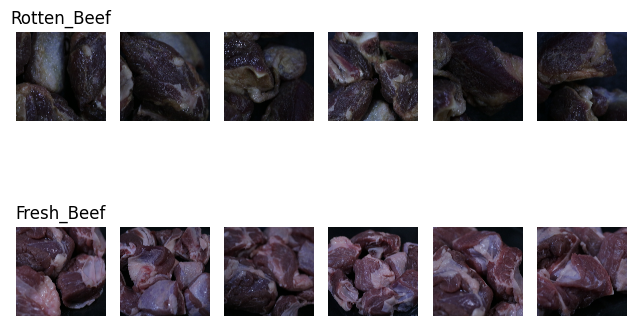

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your dataset directory
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Beef"

# Define the image file extension as '.JPG'
image_extension = '.JPG'

# Define the number of sample images to visualize per class
num_samples_per_class = 6

# Create a list to store sample image paths
sample_image_paths = []

# Get a list of class folders
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define the number of columns for subplots
num_columns = num_samples_per_class

# Iterate through class folders
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.endswith(image_extension)]

    if not image_files:
        continue  # Skip empty folders

    # Randomly select 6 images for visualization
    sample_images = random.sample(image_files, min(num_samples_per_class, len(image_files)))

    sample_image_paths.extend([os.path.join(class_path, img) for img in sample_images])

# Calculate the number of rows required
num_rows = (len(sample_image_paths) + num_columns - 1) // num_columns

# Visualize sample images with class names
for i, image_path in enumerate(sample_image_paths, start=1):
    plt.subplot(num_rows, num_columns, i)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

    if i % num_columns == 1:
        plt.title(class_folders[i // num_columns])

plt.tight_layout()
plt.show()


Found 415 images belonging to 2 classes.
Number of classes: 2
Class labels: {'Fresh_Beef': 0, 'Rotten_Beef': 1}
Number of images per class:
Rotten_Beef: 214 images
Fresh_Beef: 201 images


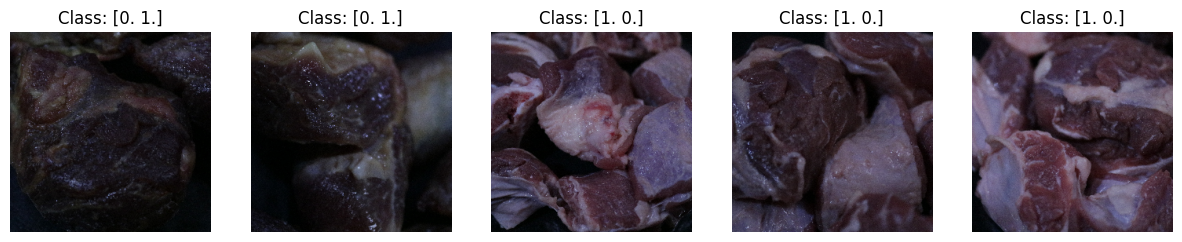

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Beef"

# Create an ImageDataGenerator for loading and preprocessing images
image_data_generator = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images from a directory
image_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(256, 256),  # Set your desired target size
    batch_size=32,           # Set your desired batch size
    class_mode='categorical'  # Set the class mode based on your dataset
)

# Display some details about the loaded dataset
print("Number of classes:", len(image_dataset.class_indices))
print("Class labels:", image_dataset.class_indices)

# Count the number of images per class
class_image_counts = {class_label: len(os.listdir(os.path.join(dataset_path, class_label)))
                      for class_label in os.listdir(dataset_path)}
print("Number of images per class:")
for class_label, count in class_image_counts.items():
    print(f"{class_label}: {count} images")

# Display a few sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    image, label = image_dataset.next()
    axes[i].imshow(image[0])
    axes[i].axis('off')
    axes[i].set_title(f"Class: {label[0]}")

plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Beef"
output_folder = "/content/drive/MyDrive/Split dataset Beef Quality Classification"

# Create output folders for train and test sets
train_folder = os.path.join(output_folder, "train")
test_folder = os.path.join(output_folder, "test")
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Loop through each class folder
for class_name in tqdm(os.listdir(dataset_path), desc="Processing classes"):
    class_path = os.path.join(dataset_path, class_name)

    # Skip non-directory entries
    if not os.path.isdir(class_path):
        continue

    # Get a list of all images in the class folder with .jpg or .JPG extension
    images = [img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))]

    # Print the list of images for each class
    print(f"Class '{class_name}' has {len(images)} image(s): {images}")

    # Check if there are any images for the current class
    if not images:
        print(f"Skipping class '{class_name}' as it has no images.")
        continue

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Save images to the corresponding train and test folders
    for img in train_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(train_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

    for img in test_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(test_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

print("Dataset splitting and copying completed.")


Processing classes:   0%|          | 0/2 [00:00<?, ?it/s]

Class 'Rotten_Beef' has 214 image(s): ['IMG_6559.JPG', 'IMG_6558.JPG', 'IMG_6560.JPG', 'IMG_6538.JPG', 'IMG_6553.JPG', 'IMG_6562.JPG', 'IMG_6545.JPG', 'IMG_6557.JPG', 'IMG_6546.JPG', 'IMG_6541.JPG', 'IMG_6555.JPG', 'IMG_6542.JPG', 'IMG_6551.JPG', 'IMG_6561.JPG', 'IMG_6547.JPG', 'IMG_6539.JPG', 'IMG_6556.JPG', 'IMG_6548.JPG', 'IMG_6550.JPG', 'IMG_6552.JPG', 'IMG_6554.JPG', 'IMG_6549.JPG', 'IMG_6543.JPG', 'IMG_6528.JPG', 'IMG_6535.JPG', 'IMG_6515.JPG', 'IMG_6519.JPG', 'IMG_6533.JPG', 'IMG_6521.JPG', 'IMG_6527.JPG', 'IMG_6537.JPG', 'IMG_6518.JPG', 'IMG_6525.JPG', 'IMG_6522.JPG', 'IMG_6544.JPG', 'IMG_6531.JPG', 'IMG_6529.JPG', 'IMG_6516.JPG', 'IMG_6536.JPG', 'IMG_6534.JPG', 'IMG_6517.JPG', 'IMG_6526.JPG', 'IMG_6524.JPG', 'IMG_6532.JPG', 'IMG_6540.JPG', 'IMG_6520.JPG', 'IMG_6523.JPG', 'IMG_6530.JPG', 'IMG_6513.JPG', 'IMG_6494.JPG', 'IMG_6509.JPG', 'IMG_6500.JPG', 'IMG_6495.JPG', 'IMG_6493.JPG', 'IMG_6512.JPG', 'IMG_6488.JPG', 'IMG_6508.JPG', 'IMG_6498.JPG', 'IMG_6499.JPG', 'IMG_6489.JPG', '

Processing classes:  50%|█████     | 1/2 [00:12<00:12, 12.75s/it]

Class 'Fresh_Beef' has 201 image(s): ['IMG_4841.JPG', 'IMG_4835.JPG', 'IMG_4846.JPG', 'IMG_4843.JPG', 'IMG_4844.JPG', 'IMG_4836.JPG', 'IMG_4838.JPG', 'IMG_4834.JPG', 'IMG_4842.JPG', 'IMG_4847.JPG', 'IMG_4845.JPG', 'IMG_4840.JPG', 'IMG_4827.JPG', 'IMG_4823.JPG', 'IMG_4825.JPG', 'IMG_4830.JPG', 'IMG_4826.JPG', 'IMG_4837.JPG', 'IMG_4816.JPG', 'IMG_4819.JPG', 'IMG_4831.JPG', 'IMG_4828.JPG', 'IMG_4821.JPG', 'IMG_4839.JPG', 'IMG_4813.JPG', 'IMG_4832.JPG', 'IMG_4817.JPG', 'IMG_4824.JPG', 'IMG_4818.JPG', 'IMG_4833.JPG', 'IMG_4829.JPG', 'IMG_4815.JPG', 'IMG_4820.JPG', 'IMG_4804.JPG', 'IMG_4798.JPG', 'IMG_4794.JPG', 'IMG_4803.JPG', 'IMG_4806.JPG', 'IMG_4808.JPG', 'IMG_4801.JPG', 'IMG_4811.JPG', 'IMG_4814.JPG', 'IMG_4822.JPG', 'IMG_4799.JPG', 'IMG_4812.JPG', 'IMG_4810.JPG', 'IMG_4809.JPG', 'IMG_4802.JPG', 'IMG_4796.JPG', 'IMG_4797.JPG', 'IMG_4800.JPG', 'IMG_4807.JPG', 'IMG_4805.JPG', 'IMG_4792.JPG', 'IMG_4779.JPG', 'IMG_4775.JPG', 'IMG_4782.JPG', 'IMG_4783.JPG', 'IMG_4777.JPG', 'IMG_4788.JPG', 'I

Processing classes: 100%|██████████| 2/2 [00:40<00:00, 20.11s/it]

Dataset splitting and copying completed.


In [ ]:
import os

# Replace this path with your split dataset path
split_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification"

# Dictionary to store the number of images per class
class_image_count = {}

# Loop through each class folder in the train set
for class_name in os.listdir(os.path.join(split_dataset_path, "train")):
    class_path = os.path.join(split_dataset_path, "train", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the train set
print("\nDiagnostic Report for Train Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")

# Reset the dictionary for the test set
class_image_count = {}

# Loop through each class folder in the test set
for class_name in os.listdir(os.path.join(split_dataset_path, "test")):
    class_path = os.path.join(split_dataset_path, "test", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the test set
print("\nDiagnostic Report for Test Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")



Diagnostic Report for Train Set:
Class 'Rotten_Beef' has 171 image(s).
Class 'Fresh_Beef' has 160 image(s).

Diagnostic Report for Test Set:
Class 'Rotten_Beef' has 43 image(s).
Class 'Fresh_Beef' has 41 image(s).


Model Training

#Beef Quality Classification using CNN

Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
Epoch 1/100
10/10 [==============================] - 17s 670ms/step - loss: 1.1711 - accuracy: 0.5418 - val_loss: 1.1473 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 5s 486ms/step - loss: 1.1332 - accuracy: 0.4682 - val_loss: 1.1044 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 5s 578ms/step - loss: 1.0675 - accuracy: 0.5819 - val_loss: 1.0225 - val_accuracy: 0.4844 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 6s 593ms/step - loss: 0.9797 - accuracy: 0.7224 - val_loss: 0.8571 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 5s 472ms/step - loss: 0.7825 - accuracy: 0.9298 - val_loss: 0.5592 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 6/100
10/10 [================

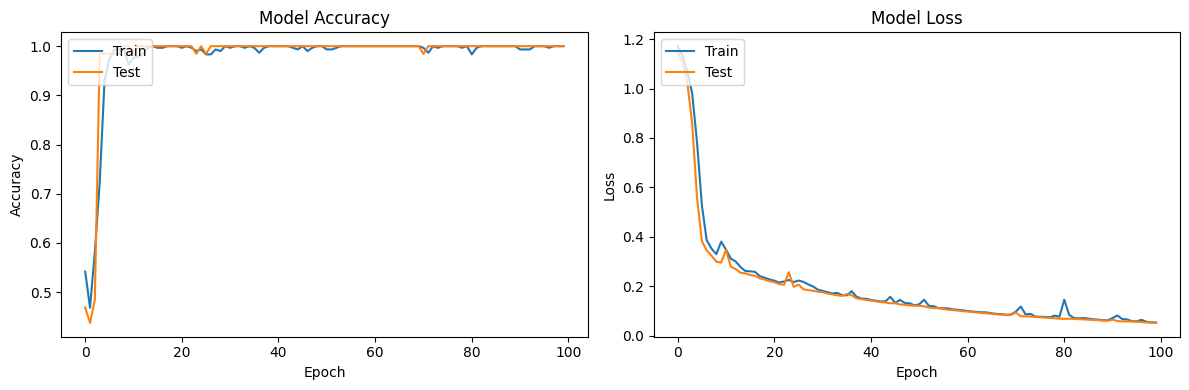

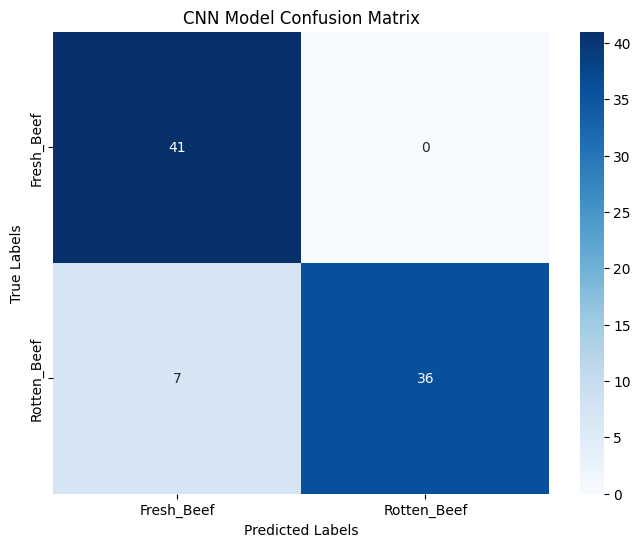

Confusion matrix saved at: /content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_6_with_augmentation_and_dropout/confusion_matrix.png


In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Apply only rescaling to the validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with more dropout and less complexity
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.7))  # Increase dropout
model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.7))  # Increase dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
history = model.fit(
    train_datagen.flow(train_data, train_labels, batch_size=32),
    epochs=100,  # Increase epochs
    steps_per_epoch=len(train_data) // 32,
    validation_data=test_datagen.flow(test_data, test_labels),
    validation_steps=len(test_data) // 32,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_6_with_augmentation_and_dropout"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save confusion matrix plot
conf_matrix_plot_path = os.path.join(model_save_path, "confusion_matrix.png")
plt.savefig(conf_matrix_plot_path, dpi=300, bbox_inches='tight')

plt.show()

print(f'Confusion matrix saved at: {conf_matrix_plot_path}')


Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
Epoch 1/100
10/10 [==============================] - 6s 391ms/step - loss: 1.1830 - accuracy: 0.4682 - val_loss: 1.1188 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 5s 480ms/step - loss: 1.1354 - accuracy: 0.4844 - val_loss: 1.1066 - val_accuracy: 0.4219 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 5s 445ms/step - loss: 1.0925 - accuracy: 0.5050 - val_loss: 1.0534 - val_accuracy: 0.4531 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 6s 636ms/step - loss: 1.0279 - accuracy: 0.6254 - val_loss: 0.9291 - val_accuracy: 0.5781 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 4s 431ms/step - loss: 0.9020 - accuracy: 0.7826 - val_loss: 0.7523 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 6/100
10/10 [=================

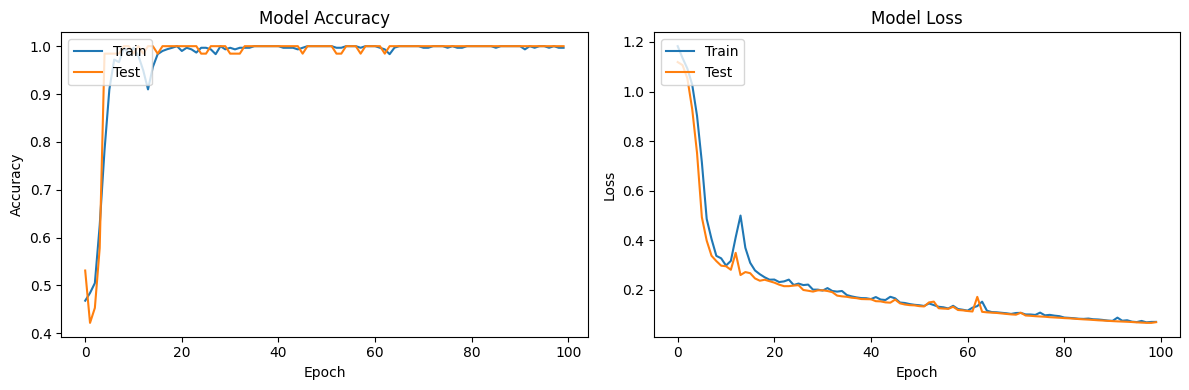

In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Apply only rescaling to the validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with more dropout and less complexity
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.7))  # Increase dropout
model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.7))  # Increase dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
history = model.fit(
    train_datagen.flow(train_data, train_labels, batch_size=32),
    epochs=100,  # Increase epochs
    steps_per_epoch=len(train_data) // 32,
    validation_data=test_datagen.flow(test_data, test_labels),
    validation_steps=len(test_data) // 32,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_6_with_augmentation_and_dropout"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
Epoch 1/100
10/10 [==============================] - 17s 679ms/step - loss: 1.6462 - accuracy: 0.4716 - val_loss: 1.5815 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 4s 443ms/step - loss: 1.5350 - accuracy: 0.5184 - val_loss: 1.4395 - val_accuracy: 0.4844 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 6s 670ms/step - loss: 1.3634 - accuracy: 0.6990 - val_loss: 1.1886 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 5s 475ms/step - loss: 1.0884 - accuracy: 0.9594 - val_loss: 0.8079 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 6s 596ms/step - loss: 0.7795 - accuracy: 0.9833 - val_loss: 0.6484 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 6/100
10/10 [================

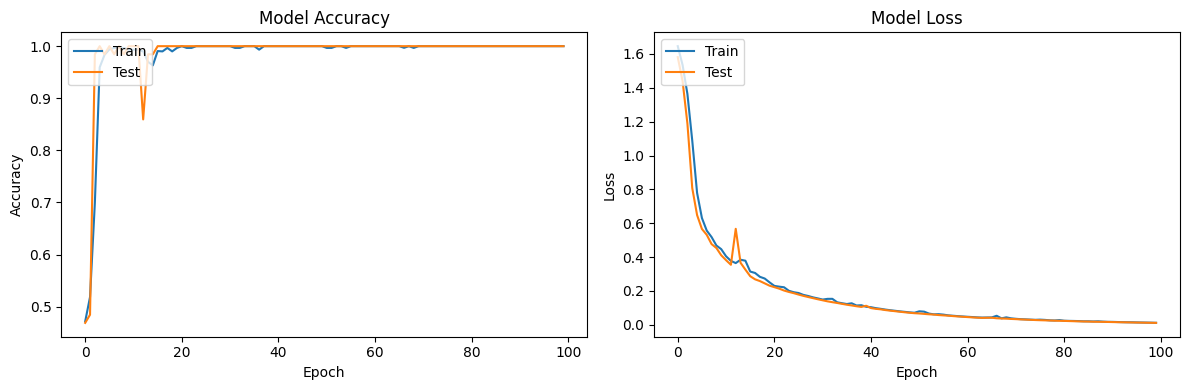

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Iteration 4
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Apply only rescaling to the validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with dropout and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Add L2 regularization
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
history = model.fit(
    train_datagen.flow(train_data, train_labels, batch_size=32),
    epochs=100,  # Increase epochs
    steps_per_epoch=len(train_data) // 32,
    validation_data=test_datagen.flow(test_data, test_labels),
    validation_steps=len(test_data) // 32,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_4_with_augmentation_and_regularization"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the model
model.save(os.path.join(model_save_path, "model.h5"))


Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
Epoch 1/100
10/10 [==============================] - 64s 6s/step - loss: 1.6334 - accuracy: 0.5050 - val_loss: 1.5840 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 58s 6s/step - loss: 1.5397 - accuracy: 0.5251 - val_loss: 1.4324 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 58s 6s/step - loss: 1.3736 - accuracy: 0.8361 - val_loss: 1.1972 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 61s 6s/step - loss: 1.1367 - accuracy: 0.9097 - val_loss: 0.9932 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 61s 6s/step - loss: 0.9436 - accuracy: 0.9064 - val_loss: 0.7425 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 6/100
10/10 [===========================

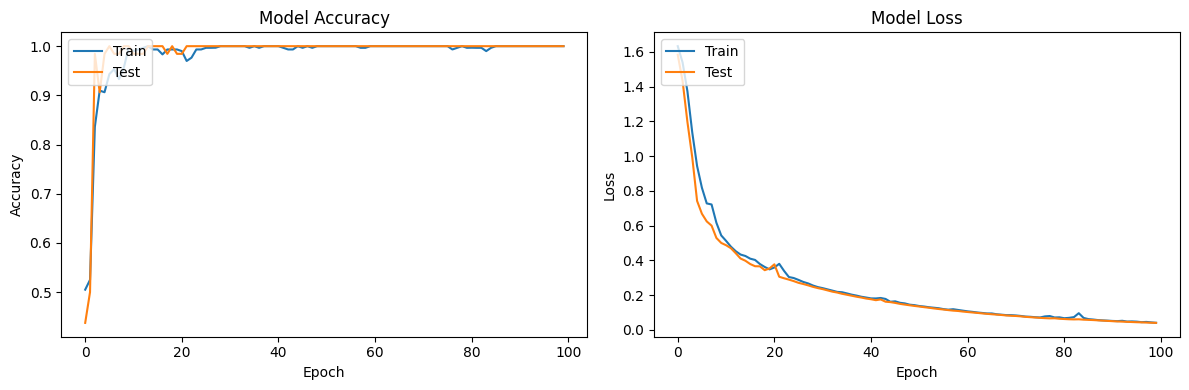

Model saved at: /content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_1_with_augmentation_and_regularization


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with dropout and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Add L2 regularization
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(train_datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=100,  # Increase epochs
                    steps_per_epoch=len(train_data) // 32,
                    validation_data=test_datagen.flow(test_data, test_labels),
                    validation_steps=len(test_data) // 32,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_1_with_augmentation_and_regularization"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the model
model.save(model_save_path)

print(f'Model saved at: {model_save_path}')


Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
Epoch 1/100
10/10 [==============================] - 7s 449ms/step - loss: 1.6540 - accuracy: 0.4750 - val_loss: 1.5557 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 5s 453ms/step - loss: 1.5087 - accuracy: 0.6421 - val_loss: 1.3647 - val_accuracy: 0.6094 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 4s 441ms/step - loss: 1.2785 - accuracy: 0.8562 - val_loss: 1.0135 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 6s 554ms/step - loss: 0.9364 - accuracy: 1.0000 - val_loss: 0.7417 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 5s 451ms/step - loss: 0.7519 - accuracy: 0.9866 - val_loss: 0.6706 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/100
10/10 [=================

3/3 [==============================] - 0s 21ms/step
Confusion Matrix:
[[41  0]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

  Fresh_Beef       0.98      1.00      0.99        41
 Rotten_Beef       1.00      0.98      0.99        43

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

Evaluation metrics saved at: /content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_1_with_augmentation_and_regularization/evaluation_metrics.txt


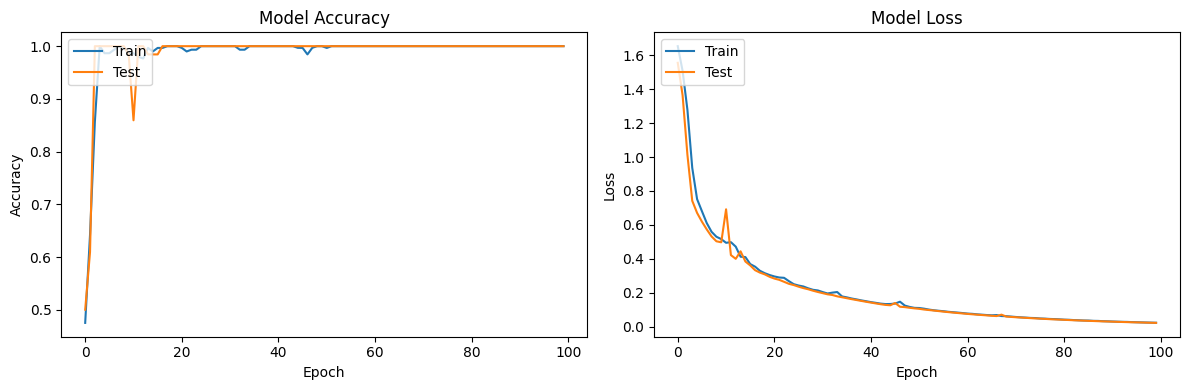

Model saved at: /content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_1_with_augmentation_and_regularization


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with dropout and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Add L2 regularization
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(train_datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=100,  # Increase epochs
                    steps_per_epoch=len(train_data) // 32,
                    validation_data=test_datagen.flow(test_data, test_labels),
                    validation_steps=len(test_data) // 32,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_1_with_augmentation_and_regularization"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the model
model.save(model_save_path)

print(f'Model saved at: {model_save_path}')


Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
Epoch 1/100
10/10 [==============================] - 7s 461ms/step - loss: 1.1693 - accuracy: 0.5151 - val_loss: 1.1452 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 6s 576ms/step - loss: 1.1331 - accuracy: 0.5017 - val_loss: 1.0621 - val_accuracy: 0.5156 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 6s 572ms/step - loss: 1.0409 - accuracy: 0.6421 - val_loss: 0.9268 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 5s 446ms/step - loss: 0.8689 - accuracy: 0.9298 - val_loss: 0.6519 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 5s 453ms/step - loss: 0.5981 - accuracy: 0.9833 - val_loss: 0.4199 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 6/100
10/10 [=================

3/3 [==============================] - 0s 21ms/step
Confusion Matrix:
[[41  0]
 [15 28]]


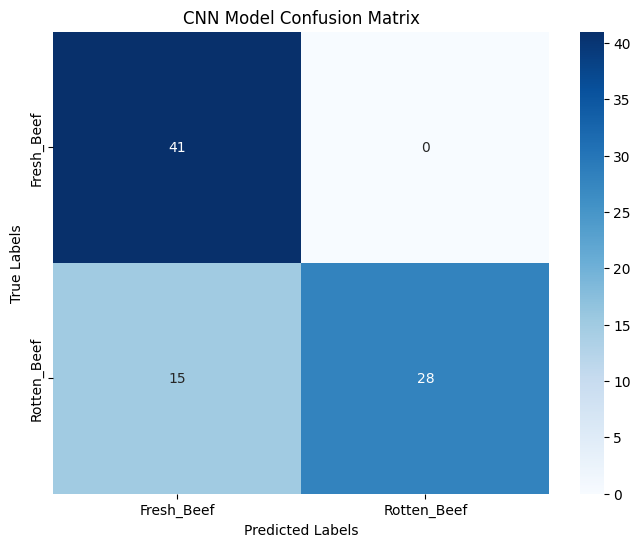

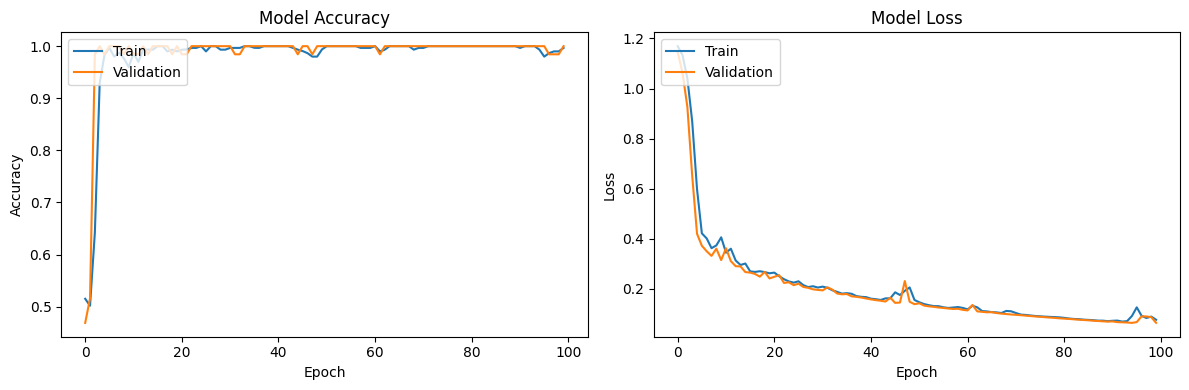

In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns  # Added for plotting confusion matrix

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Apply only rescaling to the validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with more dropout and less complexity
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.7))  # Increase dropout
model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.7))  # Increase dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
history = model.fit(
    train_datagen.flow(train_data, train_labels, batch_size=32),
    epochs=100,  # Increase epochs
    steps_per_epoch=len(train_data) // 32,
    validation_data=test_datagen.flow(test_data, test_labels),
    validation_steps=len(test_data) // 32,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot
conf_matrix_plot_path = os.path.join("/content/drive/MyDrive/Trained model/Beef Quality Classification/CNN/Iteration_6_with_augmentation_and_dropout", "confusion_matrix_plot.png")
plt.savefig(conf_matrix_plot_path, dpi=300, bbox_inches='tight')

plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
